# Lab 1: Data Analysis with HTRU2 Dataset

**Author:** Linda Jin [YOURNAME]

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Learn statistical analysis, probability calculations, and data visualization using real pulsar survey data.

## Overview

In this laboratory, we will:
1. Set up git & GitHub for version control
2. Analyze pulsar candidates from the High Time Resolution Universe Survey (HTRU2) dataset
3. Practice statistical analysis and probability calculations
4. Create data visualizations and interpret results

**Key Learning Outcomes:**
- Understanding of statistical distributions
- Bayes' theorem application
- Data visualization with histograms
- Probability calculations with real data

## Step 1: Import Required Libraries

Import the necessary Python libraries for data analysis and visualization.

**TODO:** Import pandas, matplotlib.pyplot, numpy, and scipy.stats

`COLAB` determines whether this notebook is running on Google Colab. If you're running locally, make sure to download all data in this work directory.

In [ ]:
COLAB = 'google.colab' in str(get_ipython())

if COLAB:
# clone github repo
    !git clone --depth 1 https://github.com/Klinjin/Au25_Phys434_Data_Analysis_Lab.git
    %cd Au25_Phys434_Data_Analysis_Lab/

In [1]:
# TODO: Import the required libraries
# Hint: You'll need pandas, matplotlib.pyplot, numpy, and scipy.stats

# Your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sciStat

Matplotlib is building the font cache; this may take a moment.


## Step 2: Load and Explore the Dataset

The HTRU2 dataset contains 17,898 pulsar candidates with 8 features each. The last column indicates the class:
- **Class 0**: RFI/Noise (fake signals)
- **Class 1**: Real pulsar signals

**Features (first 4 are from integrated pulse profile):**
1. Mean of the integrated profile
2. Standard deviation of the integrated profile  
3. Excess kurtosis of the integrated profile
4. Skewness of the integrated profile
5-8. Mean, std dev, excess kurtosis, and skewness of the DM-SNR curve

**TODO:** Load the dataset and separate it into two classes

In [2]:
# Load the HTRU2 dataset
# TODO: Read the CSV file using pandas

df = pd.read_csv('htru2/HTRU_2.csv')

In [4]:
df.shape

(17897, 9)

In [23]:
# Separate the data into two classes based on the last column
# TODO: Create class_0_data (RFI/Noise) and class_1_data (Real Pulsar)
# Hint: Use boolean indexing with df.iloc[:, -1] <- gives values of last column

# add column names to the dataframe, for later
df.columns = ['mean_ip', 'std_ip', 'ek_ip', 'skew_ip', 'mean_ds', 'std_ds', 'ek_ds', 'skew_ds', 'class']
# create mask 
mask_0 = df.iloc[:,-1] == 0
mask_1 = df.iloc[:,-1] == 1

pulsar_data = df[mask_1]
noise_data = df[mask_0]


In [24]:
# Print the number of samples in each class
# TODO: Print the lengths of both classes

nPulsar = pulsar_data.shape[0] # shape gives (row#, column#)
nNoise = noise_data.shape[0]

print(f"Number of Samples in Each Class\nPulsar (Class 1):\t{nPulsar}\nNoise (Class 0):\t{nNoise}")

Number of Samples in Each Class
Pulsar (Class 1):	1639
Noise (Class 0):	16258


## Step 3: Feature Analysis and Visualization

**Objective:** Compare the distribution of features between RFI/noise and real pulsar signals.

**Requirements:**
- Create histograms for each feature (focus on the first 4 features from integrated pulse profile)
- Plot both classes on the same graph with different colors and line styles
- Normalize histograms so the area equals 1 (use `density=True`)
- Use the same bin ranges and widths for fair comparison
- Include mean and standard deviation in legends
- Proper axis labels and titles

**TODO:** Create histograms comparing the two classes for each feature

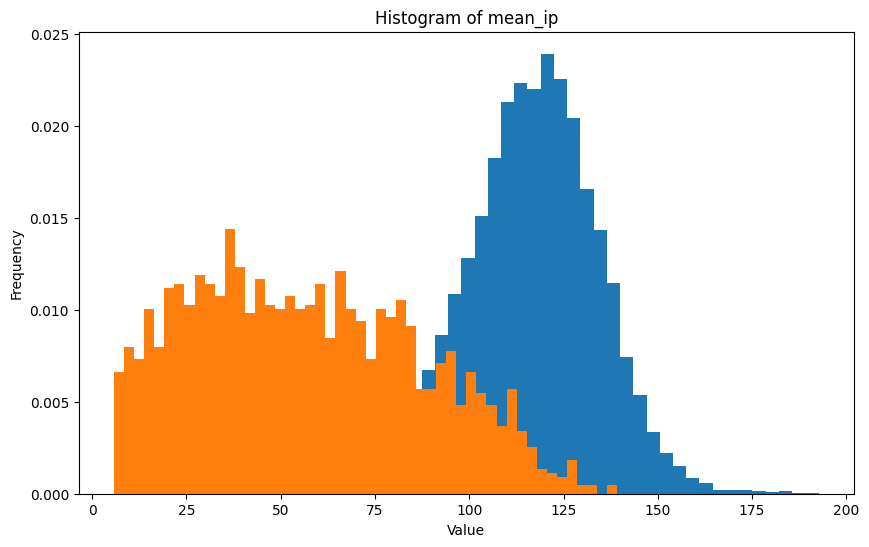

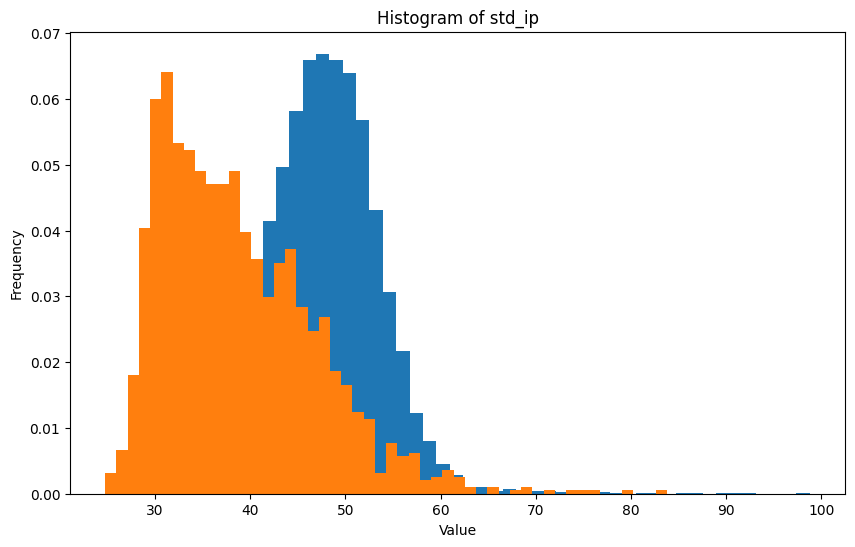

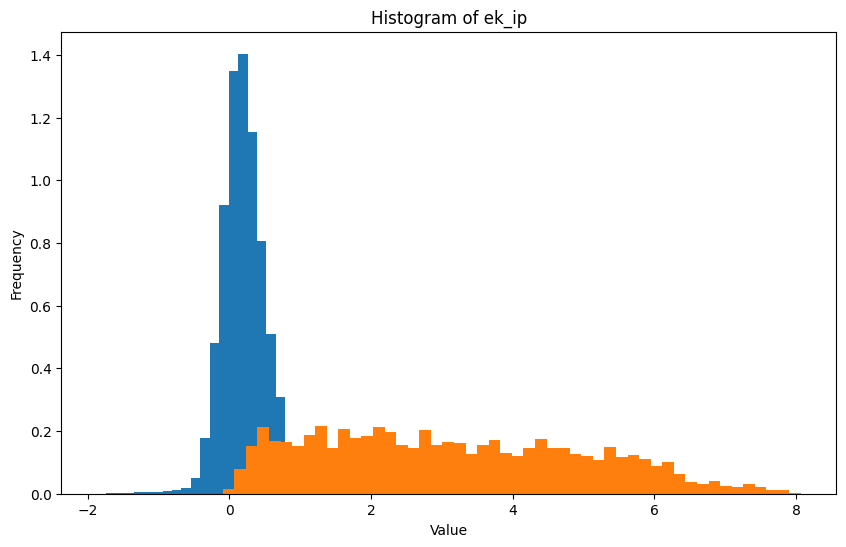

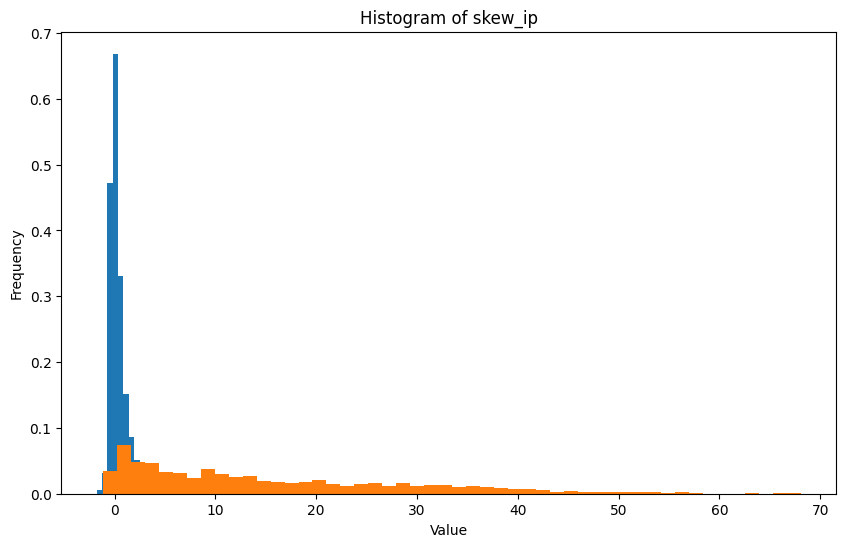

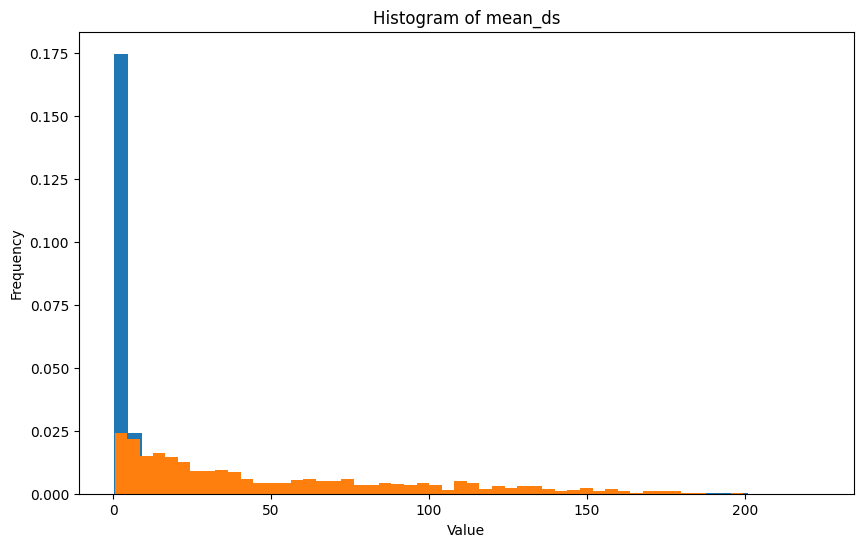

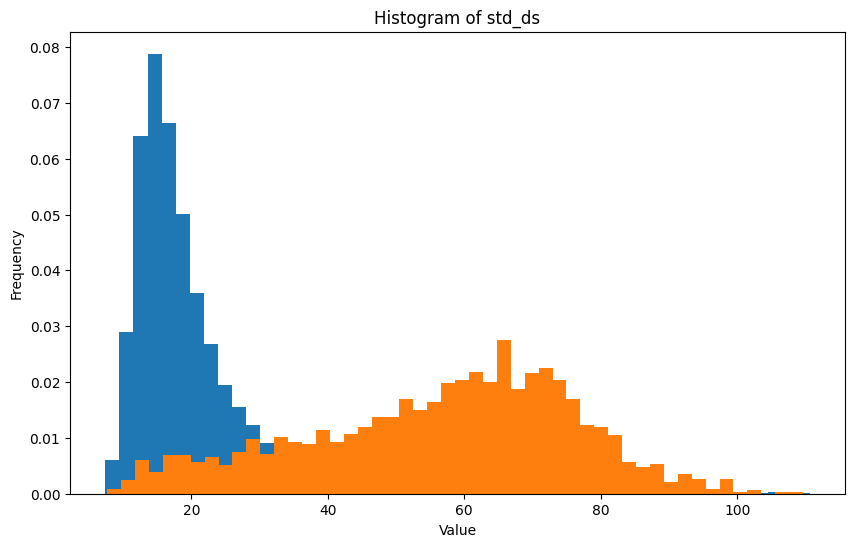

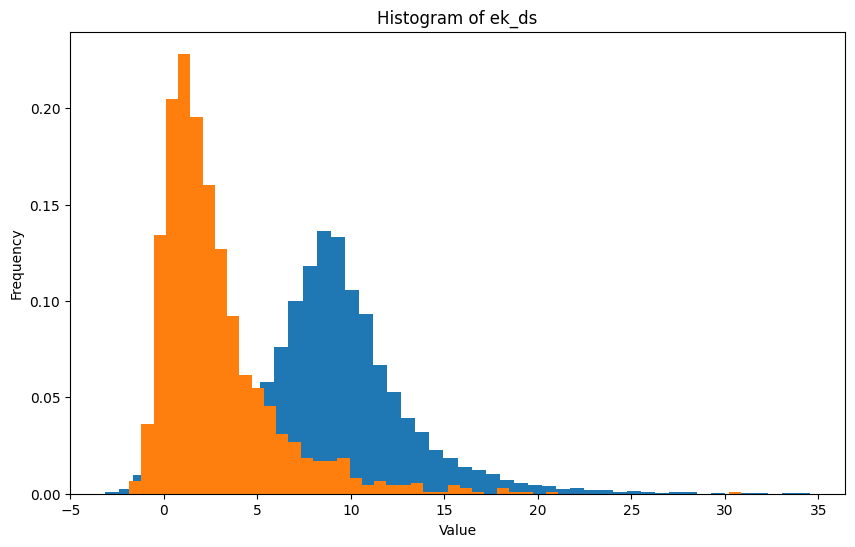

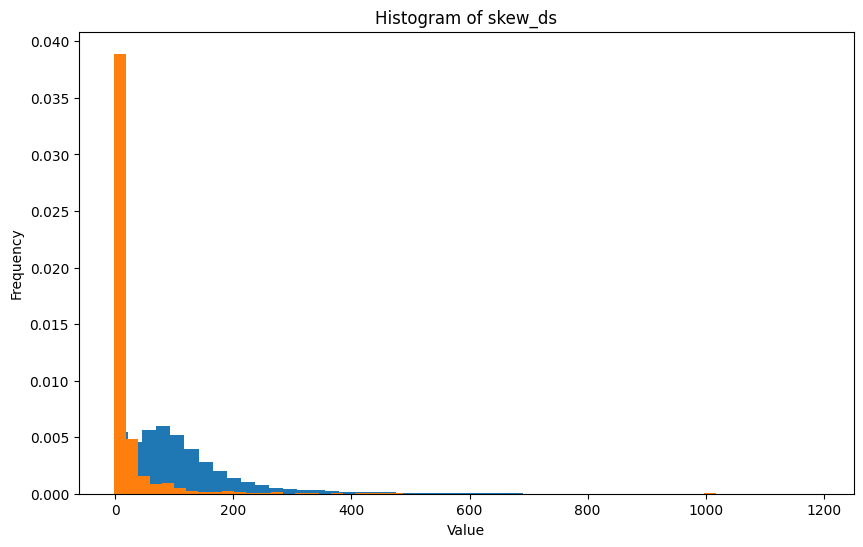

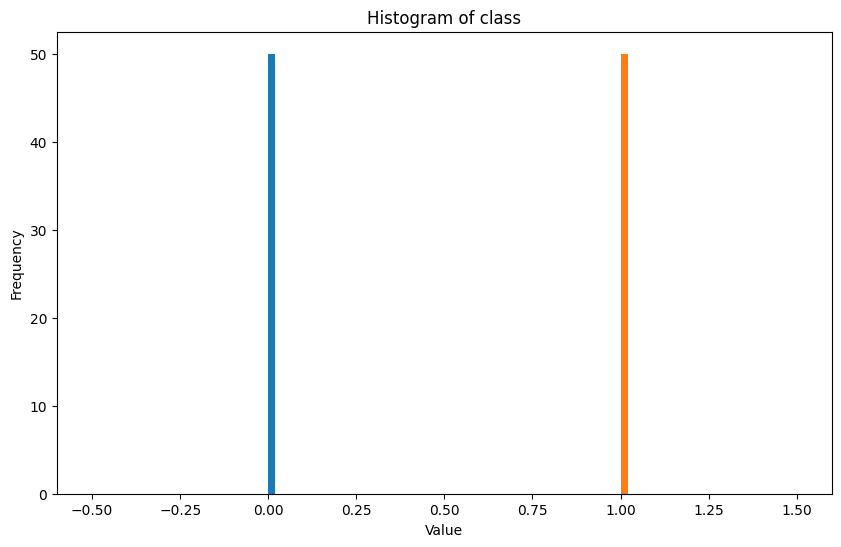

In [27]:
# Create histograms for the first 4 features (integrated pulse profile features)
# TODO: Loop through the first 4 columns of the dataset

for i, feature_name in enumerate(df.columns): 
    noise_feature = noise_data[feature_name]
    pulsar_feature = pulsar_data[feature_name]

    # Create figure
    nBins = 50
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(noise_feature, bins=nBins, density=True)
    ax.hist(pulsar_feature, bins=nBins, density=True)
    ax.set_title(f"Histogram of {feature_name}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    #ax.legend()
    plt.show()

#     pass  # Remove this line when you add your code

# Your code here:



## Step 4: Probability Calculations

**Objective:** Calculate basic probabilities and apply Bayes' theorem.

**Define Events:**
- **Event A:** An observation is a pulsar candidate (class = 1)
- **Event B:** Mean of the integrated profile < 80

**Calculate the following probabilities:**
1. P(A) - Probability that a randomly chosen observation is a real pulsar
2. P(B) - Probability that mean of integrated profile < 80
3. P(A ∩ B) - Probability that both conditions are satisfied

In [25]:
type(df.columns)

pandas.core.indexes.base.Index

**TODO:** Calculate the three basic probabilities

In [ ]:
# Calculate P(A): Probability that an observation is a pulsar candidate
# TODO: Calculate the ratio of class 1 samples to total samples
# pulsar_probability = 

print("P(A) = ", pulsar_probability)

# Calculate P(B): Probability that mean of integrated profile < 80
# TODO: Count how many samples have the first feature < 80
# Hint: Use boolean indexing on df.iloc[:, 0] < 80
# count_less_than_80 = 
# prob_less_than_80 = 

print("P(B) = ", prob_less_than_80)

# Calculate P(A ∩ B): Probability that both conditions are satisfied
# TODO: Count samples that are both class 1 AND have first feature < 80
# Hint: Filter class_1_data where first column < 80
# prob_both_conditions = 

print("P(A ∩ B) = ", prob_both_conditions)

# Your code here:

## Step 5: Conditional Probabilities (Bayes' Theorem)

**Objective:** Calculate conditional probabilities using Bayes' theorem.

**Bayes' Theorem Formula:**
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

**Calculate:**
1. **P(A|B)**: Given that mean of integrated profile < 80, what's the probability it's a real pulsar?
2. **P(B|A)**: Given that it's a real pulsar, what's the probability that mean < 80?

**TODO:** Apply Bayes' theorem to calculate conditional probabilities

In [ ]:
# Apply Bayes' theorem to calculate conditional probabilities

# TODO: Calculate P(A|B) = P(A ∩ B) / P(B)
# This answers: "Given mean < 80, what's the probability it's a real pulsar?"
# conditional_prob_A_given_B = 

print('P(A | B) = P(A ∩ B) / P(B) = ', conditional_prob_A_given_B)

# TODO: Calculate P(B|A) = P(A ∩ B) / P(A) 
# This answers: "Given it's a real pulsar, what's the probability that mean < 80?"
# conditional_prob_B_given_A = 

print('P(B | A) = P(A ∩ B) / P(A) = ', conditional_prob_B_given_A)

# Your code here:

## Step 6: Standard Normal Distribution Analysis

**Objective:** Understand different types of probabilities for the standard normal distribution.

**Background:** 
The standard normal distribution (Z) has mean = 0 and standard deviation = 1. 
For any Z-score, we can calculate:
1. **Cumulative probability (CDF)**: P(Z ≤ z) - probability below z
2. **Cumulative from mean**: P(0 ≤ Z ≤ z) - probability between mean and z  
3. **Complementary cumulative**: P(Z > z) - probability above z

**Formula:** If X ~ N(μ, σ²), then Z = (X - μ)/σ

**TODO:** Calculate probabilities for different Z-values

In [ ]:
# Calculate different types of probabilities for Z-values
# TODO: Import norm from scipy.stats if not already imported
# from scipy.stats import norm

# Define Z-values to analyze
Z_values = [1, 3, 5]

# TODO: Create an empty list to store results
# results = []

# TODO: Loop through each Z value and calculate:
for Z in Z_values:
    # 1. CDF: Cumulative probability P(Z <= z)
    # CDF = 
    
    # 2. Cumulative from mean: P(0 <= Z <= z) = CDF - 0.5
    # cumulative_prob_from_mean = 
    
    # 3. Complementary CDF: P(Z > z) = 1 - CDF  
    # complementary_CDF = 
    
    # TODO: Append results to list
    # results.append((Z, CDF, cumulative_prob_from_mean, complementary_CDF))
    
    pass  # Remove this when you add your code

# TODO: Print results in a formatted way
# for Z, CDF, cumulative_prob_from_mean, complementary_CDF in results:
#     print(f"Z = {Z}:")
#     print(f"Cumulative Probability (CDF) = {CDF}")
#     print(f"Cumulative Probability from Mean = {cumulative_prob_from_mean}")
#     print(f"Complementary Cumulative Probability (1 - CDF) = {complementary_CDF}\n")

# Your code here:

## Step 7: Bonus - p-value Calculation

**Challenge:** Calculate the p-value for Z = 5.9

**p-value definition:** The probability of obtaining a result at least as extreme as the observed result, assuming the null hypothesis is true. For a Z-score, this is typically P(Z > |z|) for a two-tailed test or P(Z > z) for a one-tailed test.

In [ ]:
# Calculate p-value for Z = 5.9
# TODO: Calculate the CDF for Z = 5.9
# This gives us the probability P(Z <= 5.9)

# p_val = 

print("p-value (CDF for Z=5.9):", p_val)

# Note: This is an extremely small probability, indicating a very rare event
# Your code here:

## Summary and Reflection Questions

**After completing this lab, you should be able to:**
1. Load and manipulate datasets using pandas
2. Create comparative histograms for data analysis
3. Calculate basic and conditional probabilities
4. Apply Bayes' theorem to real-world problems
5. Understand different types of probabilities in normal distributions

**Discussion Questions:**
1. Which features show the clearest separation between noise and real pulsars?
2. What does the conditional probability P(A|B) tell us about the relationship between pulsar classification and the mean integrated profile?
3. How do the three types of Z-score probabilities relate to different research questions?
4. What would you conclude about the practical significance of a Z-score of 5.9?

**Next Steps:**
- Commit your completed notebook to your GitHub repository
- Compare your results with your lab partner
- Prepare to discuss your findings in the next class